### This notebook shows the usage of the light curve package

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from light_curve import create_lc, gp_interpolation
import warnings

In [144]:
%config InlineBackend.figure_format ='retina'
warnings.filterwarnings("ignore")

In [145]:
# ===== SN at work ==== #
# ===================== #

# Details of the object under study

Object = 'SN2012cg'
Host = 'NGC 4424'
RA = '12:27:12.83'
DEC = '+9:25:13.2'
z = 0.0014
EB_V_Gal = 0.0179            # Na ID around maximum (Turatto 2003)
EB_V_Gal_err = 0.0004
EB_V_Host = 0.18                # Schlafly & Finkbeiner 2011
EB_V_Host_err = 0.05
DM = 30.9    
DM_err = 0.30               # modz  http://leda.univ-lyon1.fr/ledacat.cgi?o=PGC%20021381
JD_offset = 0.0   

In [146]:
object_dir = '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/'

uv_mag = object_dir + '2012cg_SOUSA.asc'

save_results = '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/'
params_file = '/Users/anirbandutta/Dropbox/SNIa_sample/SN_UVLC/LC_params/' + Object + '.txt'

In [147]:
# Find data files

# A filter file containing all the required information on bandpasses
FILTER_directory = '/Users/anirbandutta/Dropbox/astromatic/'            # Filter information 
FILTER_data = FILTER_directory+'FILTERS.dat'

#--------------------------------------------------#

In [148]:
# Read the filter file containing data on filters 

filter_df = pd.read_csv(FILTER_data, sep = '\s+')
filter_df = filter_df.replace('INDEF', np.nan).set_index(['FILTER', 'Marker', 'Color']).astype('float64')
filter_df = filter_df.reset_index().set_index('FILTER')
list_filters = filter_df.index.tolist()

In [149]:
# create a light curve class
lc = create_lc(uv_mag)

In [150]:
# Know your data  bit
# transform from your data table from a wide format to long format
uvmag_df = lc.get_swift_lc()[0]
uvmag_df['JD'] = uvmag_df['JD'].apply(lambda x: x + 2400000.5)
uvmag_df = uvmag_df.dropna()
print (uvmag_df)

               JD FILTER     MAG   MERR
0    2.456066e+06   UVW2  18.832  0.170
1    2.456066e+06   UVW2  18.832  0.170
2    2.456068e+06   UVW2  18.437  0.144
3    2.456071e+06   UVW2  16.780  0.082
4    2.456072e+06   UVW2  16.359  0.079
..            ...    ...     ...    ...
228  2.456119e+06      V  13.612  0.042
229  2.456119e+06      V  13.660  0.044
230  2.456127e+06      V  13.989  0.051
231  2.456127e+06      V  13.966  0.050
232  2.456131e+06      V  14.180  0.062

[186 rows x 4 columns]


In [151]:
# interpolate the B-band to know the B-band maximum, JD at maximum
interp = gp_interpolation(uvmag_df, 'B', supernova=Object)

You are working on SN2012cg
The following are the interpolated values for the band B 
JD at maximum = 2456081.268877 
Mag at maximum = 12.158802 +/- 0.019801
dm15 = 0.911409 +/- 0.036039


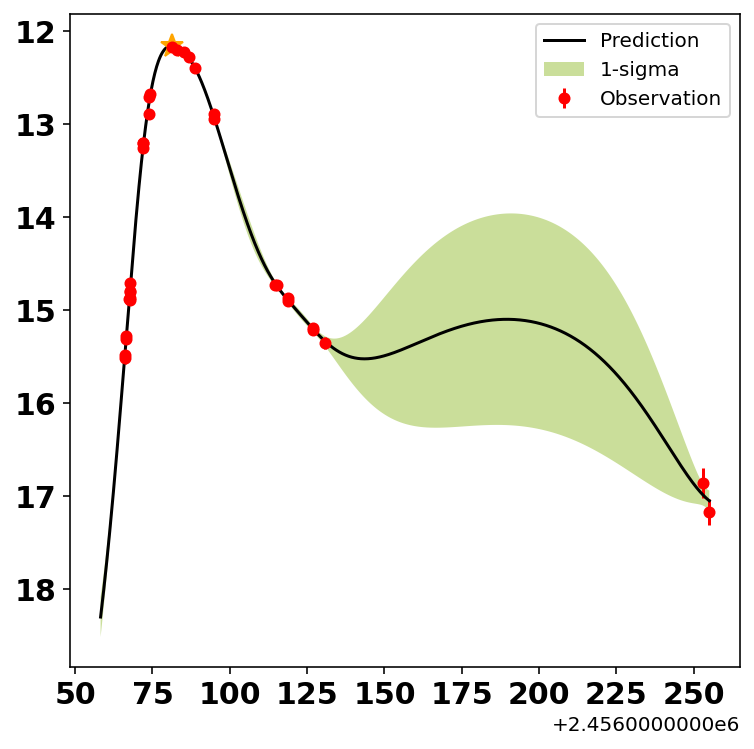

In [152]:
# Parameters of gp fit.
params = interp.interpolate_lc(verbose=True, amp=None, scale=30, diff_deg=2, plot_interp=True,
                              find_two_peaks=False)

In [153]:
interp.monte_carlo(mc_trials=100, save_results=save_results, Object=Object, store_params=True)

In [154]:
interp.save_file(params_file, Object, z, RA, DEC, Host, EB_V_Gal, EB_V_Gal_err, EB_V_Host, EB_V_Host_err, DM, DM_err)

In [155]:
# get the rest frame df 
# (t-t0)/(1+z) to first order
#rest_frame_df = lc.restframe(t0=2455611.65, z=z, epoch=0.0, mode='column')
#rest_frame_df = rest_frame_df[rest_frame_df['MAG'] != 99.99]

In [156]:
# plot the light curves
#uv_lc = create_lc(uvoptical_mag)

In [157]:
#uvsn_df = uv_lc.column_to_row(offset=2400000)

In [158]:
#uvsn_df = uvsn_df[uvsn_df['MAG'] != 99.99]
#print (uvsn_df)

In [159]:
# # interpolate the B-band to know the B-band maximum, JD at maximum
# interp = gp_interpolation(uvsn_df, 'uvb', supernova='SN2011aa')

In [160]:
# Parameters of gp fit.
# params = interp.interpolate_lc(verbose=True, amp=None, scale=30, diff_deg=2, plot_interp=True,
#                               find_two_peaks=False)

In [161]:
#uv_rest_frame_df = uv_lc.restframe(t0=2455611.65, z=z, epoch=0.0, mode='column')

In [162]:
# fig_app = plt.figure(figsize = (10, 10))
# ax = fig_app.add_subplot(111)
# uv_lc.plot_params(ax, ml_x = 20, mil_x = 5, ml_y = 2, mil_y = 0.5, invert=True)
# legend_properties = {'size':18, 'weight':'book'}
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['axes.linewidth'] = 3
# ax.set_ylim(21.0, 11.5)

# #-----------------------------------------------------------------------------------------------#
# ## UBVRI photometry dataframe

# offset = [+1.2, -2.0, -1.0, +2.7, +0.0]
# str_offset = ['+1.2', '-2.0', '-1.0 ', '+2.7', ' ']
# i = 0
# line1 =[]
# for band, band_df in rest_frame_df.groupby('FILTER'):
#     line1 += ax.plot(band_df['Phase'], band_df['MAG']+offset[i], mfc = filter_df.loc[band, 'Color'],
#                     mec = filter_df.loc[band, 'Color'], markeredgewidth=3.5, 
#                     marker = filter_df.loc[band, 'Marker'],  markersize = 10,
#                     alpha = 0.7, label = str(band) + str_offset[i], ls = ' ')
                    
#     ax.errorbar(band_df['Phase'], band_df['MAG']+offset[i], yerr = band_df['MERR'], fmt = '',
#                 c = filter_df.loc[band, 'Color'], ls = '', lw = 0.7, capsize=2, capthick=1)
    
#     line1.append(line1)
    
#     i = i+1
    
# handles_1,labels_1 = ax.get_legend_handles_labels()    
# handles_1 = [handles_1[3], handles_1[0], handles_1[4], handles_1[2], handles_1[1]]
# labels_1 = [labels_1[3], labels_1[0], labels_1[4], labels_1[2], labels_1[1]]
# legend_1 = ax.legend(handles_1,labels_1, frameon= False, 
#                      fancybox = False, shadow = False, framealpha=0.3, facecolor = 'white', 
#                      prop = legend_properties, bbox_to_anchor=(1.0, 0.6))

# ax.add_artist(legend_1)

# #-----------------------------------------------------------------------------------------------#
# ## Swift-UVOT dataframe

# offset = [+1.2, +2.6, +2.7, 0.0, +2.6, +3.5]
# str_offset = ['+1.2', '+2.6', '+2.7', ' ', '+2.6', '+3.5']
# i = 0
# line2 = []
# for band, band_df in uv_rest_frame_df.groupby('FILTER'):
        
#         line2 += ax.plot(band_df['Phase'], band_df['MAG']+offset[i], mfc = 'white', 
#                      marker = filter_df.loc[band.lower(), 'Marker'], markersize = 10, label = str(band.lower()) + str_offset[i], ls =' ',
#                      markeredgecolor = filter_df.loc[band.lower(), 'Color'], markeredgewidth=2.5, 
#                         alpha =0.8)
#         ax.errorbar(band_df['Phase'], band_df['MAG']+offset[i], yerr=band_df['MERR'], fmt='',
#                     c=filter_df.loc[band.lower(), 'Color'], ls='', lw=0.7, capsize=2, capthick=1,
#                    label = str(band.lower()) + str_offset[i])

#         i = i+1
    

# labels_2 = [l.get_label() for l in line2]
# line2 = [line2[5], line2[1], line2[4], line2[2], line2[0], line2[3]]
# labels_2 = [labels_2[5], labels_2[1], labels_2[4], labels_2[2], labels_2[0], labels_2[3]]
# legend_2 = ax.legend(line2, labels_2, frameon= False, 
#                      fancybox = False, framealpha =0.3, shadow = False, facecolor = 'white', 
#                      prop = legend_properties, bbox_to_anchor=(1.0, 0.5), numpoints =1)  



# ax.set_xlabel(r'Rest frame time since $B$-band maximum [days]', fontsize = 20)
# ax.set_ylabel('Apparent Magnitude [mag] + constant', fontsize = 20)

# for tick in ax.xaxis.get_major_ticks():
#     tick.label1.set_fontsize(fontsize = 20)
    
# for tick in ax.yaxis.get_major_ticks():
#     tick.label1.set_fontsize(fontsize = 20)
    
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)    

# ax.set_xlim(-14, 80)
# ax.set_ylim(23.0, 12.0)